# INSTAGRAM REACH ANALYSIS - ML

The Instagram Reach Analysis project aims to utilize machine learning techniques to analyze and understand the reach and engagement of Instagram posts. Instagram is a popular social media platform with millions of users, and understanding the factors that impact the reach of posts can be valuable for individuals, influencers, and businesses alike.

1.Import necessary modules

In [38]:
import pandas as pd
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import LinearRegression

# Data Pre-processing

2.Read the Dataset

In [4]:
data = pd.read_csv("Instagram data.csv", encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

3.Check for null values

In [5]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

4.Drop the null values

In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# Analysis

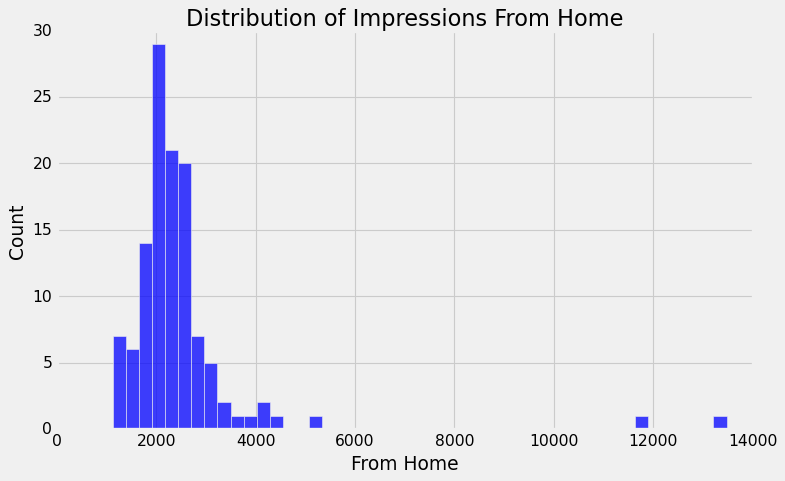

In [31]:
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'])
plt.show()

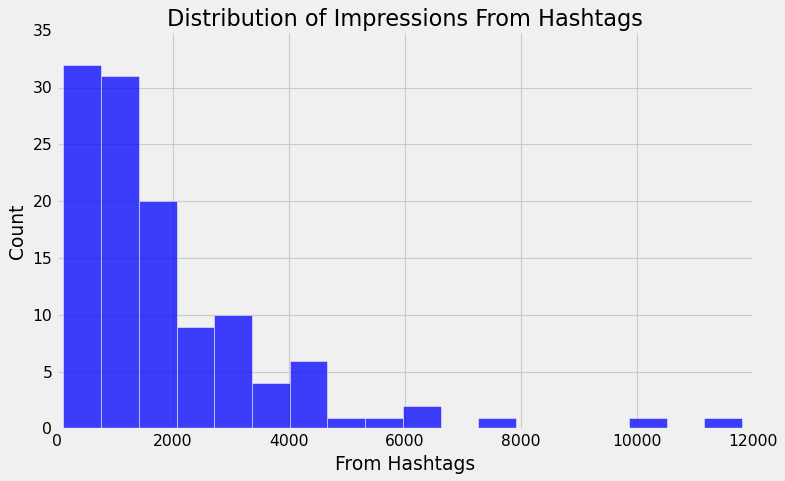

In [33]:
plt.figure(figsize=(10, 6))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(data['From Hashtags'])
plt.show()

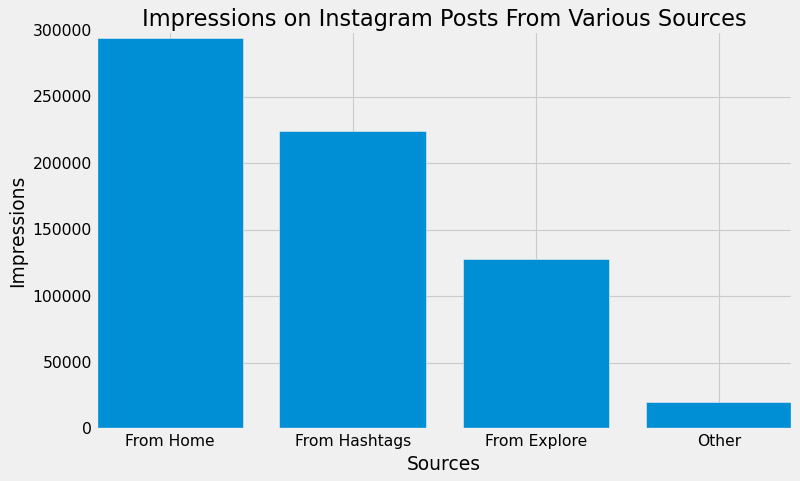

In [34]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.bar(labels, values)
plt.title('Impressions on Instagram Posts From Various Sources')
plt.xlabel('Sources')
plt.ylabel('Impressions')
plt.show()


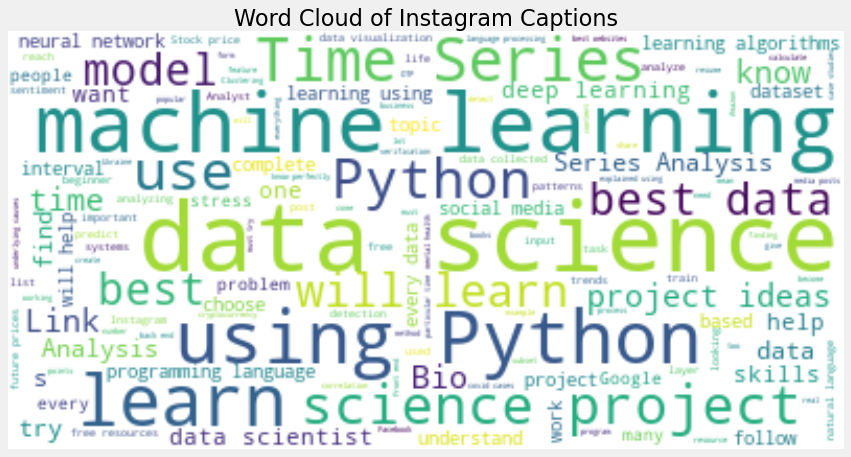

In [35]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Instagram Captions")
plt.show()


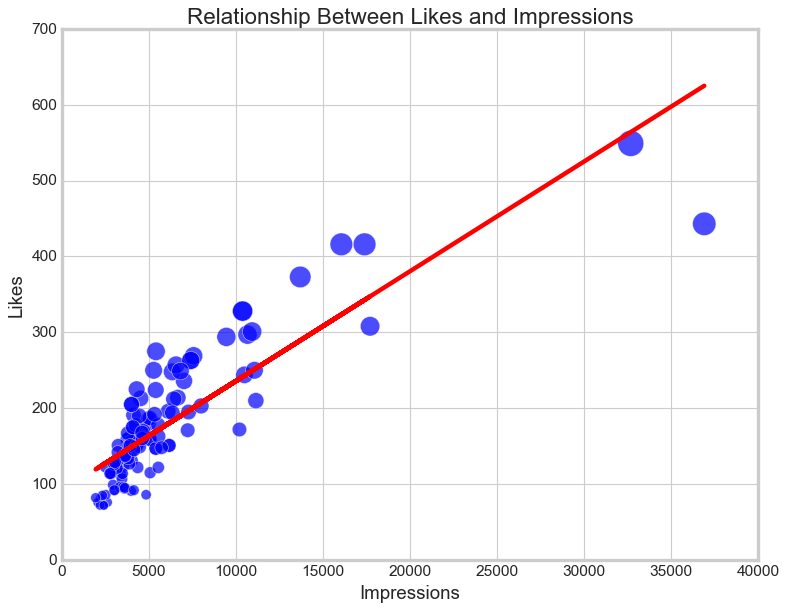

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
plt.scatter(data["Impressions"], data["Likes"], s=data["Likes"], alpha=0.7)
plt.title("Relationship Between Likes and Impressions")
plt.xlabel("Impressions")
plt.ylabel("Likes")

# Fit and plot the trendline
regression = LinearRegression()
regression.fit(data[["Impressions"]], data["Likes"])
plt.plot(data["Impressions"], regression.predict(data[["Impressions"]]), color='red')

plt.show()


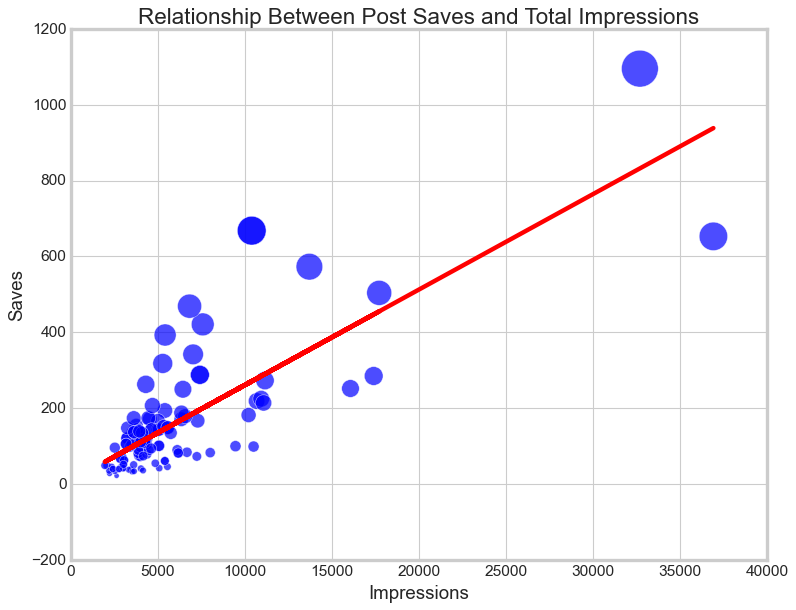

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Assuming 'data' is the DataFrame containing the relevant data

sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
plt.scatter(data["Impressions"], data["Saves"], s=data["Saves"], alpha=0.7)
plt.title("Relationship Between Post Saves and Total Impressions")
plt.xlabel("Impressions")
plt.ylabel("Saves")

# Fit and plot the trendline
regression = LinearRegression()
regression.fit(data[["Impressions"]], data["Saves"])
plt.plot(data["Impressions"], regression.predict(data[["Impressions"]]), color='red')

plt.show()


In [14]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [15]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


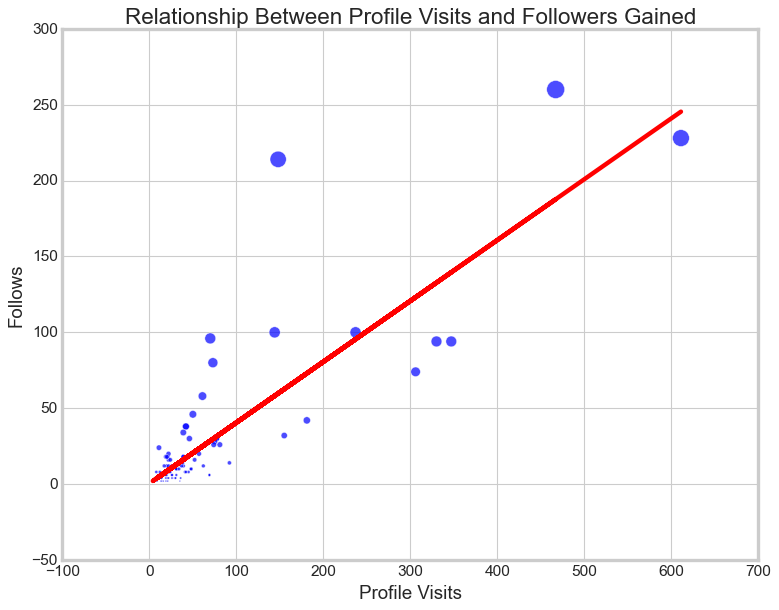

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Assuming 'data' is the DataFrame containing the relevant data

sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
plt.scatter(data["Profile Visits"], data["Follows"], s=data["Follows"], alpha=0.7)
plt.title("Relationship Between Profile Visits and Followers Gained")
plt.xlabel("Profile Visits")
plt.ylabel("Follows")

# Fit and plot the trendline
regression = LinearRegression()
regression.fit(data[["Profile Visits"]], data["Follows"])
plt.plot(data["Profile Visits"], regression.predict(data[["Profile Visits"]]), color='red')

plt.show()


In [17]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [18]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8931842690711634

In [19]:
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12610.23855498])